Classification Project - Telco Co. Churn

In [26]:
# imports
# remove warnings
import warnings
warnings.filterwarnings("ignore")
# import libraries
import numpy as np
from pydataset import data
import pandas as pd
from scipy import stats
# import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
# import visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# import useful modules
import acquire
import prepare
# modeling/evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Data Acquisition

In [2]:
# acquire TecoCo data
df = acquire.get_telco_data()
df

Let me get that for you...


,Unnamed: 0,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,0,1,2,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,Mailed check,DSL
1,1,1,2,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,Mailed check,DSL
2,2,2,1,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Electronic check,Fiber optic
3,3,2,1,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Electronic check,Fiber optic
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Mailed check,Fiber optic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,1,2,2,9987-LUTYD,Female,0,No,No,13,...,Yes,No,No,No,55.15,742.9,No,One year,Mailed check,DSL
7039,7039,2,1,1,9992-RRAMN,Male,0,Yes,No,22,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Electronic check,Fiber optic
7040,7040,1,2,1,9992-UJOEL,Male,0,No,No,2,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,Mailed check,DSL
7041,7041,1,2,3,9993-LHIEB,Male,0,Yes,Yes,67,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,Mailed check,DSL


In [3]:
#check data for any missing values
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   payment_type_id           7043 non-null   int64  
 3   contract_type_id          7043 non-null   int64  
 4   customer_id               7043 non-null   object 
 5   gender                    7043 non-null   object 
 6   senior_citizen            7043 non-null   int64  
 7   partner                   7043 non-null   object 
 8   dependents                7043 non-null   object 
 9   tenure                    7043 non-null   int64  
 10  phone_service             7043 non-null   object 
 11  multiple_lines            7043 non-null   object 
 12  online_security           7043 non-null   object 
 13  online_backup             7043 non-null   object 
 14  device_p

In [4]:
# check for any missing values
print(df.isnull().sum())

Unnamed: 0                  0
internet_service_type_id    0
payment_type_id             0
contract_type_id            0
customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
contract_type               0
payment_type                0
internet_service_type       0
dtype: int64


Data Preparation

Dropped columns = ['Unnamed: 0', 'internet_service_type_id', 'payment_type_id', 'contract_type_id']. These columns held no intel value.

Created dummy columns of ['gender', 'payment_type', 'contract_type', 'internet_service_type']

- gender_Male = '0' is female, '1' is male
- payment_type = electronic check, mailed check, credit card( 0 is not automatic, 1 is automatic)
- contract_type = one year, two year
- internet_service_type = Fiber optic(0 is DSL, 1 is Fiber Optic), None

In [5]:
# prepare data telco data for modeling
telco_data = prepare.prep_telco(df)
# rename columns with spaces to underscores
telco_data.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
telco_data


,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,total_charges,churn,gender_Male,payment_type_Credit_card_(automatic),payment_type_Electronic_check,payment_type_Mailed_check,contract_type_One_year,contract_type_Two_year,internet_service_type_Fiber_optic,internet_service_type_None
0,0002-ORFBO,0,Yes,Yes,9,Yes,No,No,Yes,No,...,593.3,0,0,0,0,1,1,0,0,0
1,0003-MKNFE,0,No,No,9,Yes,Yes,No,No,No,...,542.4,0,1,0,0,1,0,0,0,0
2,0004-TLHLJ,0,No,No,4,Yes,No,No,No,Yes,...,280.85,1,1,0,1,0,0,0,1,0
3,0011-IGKFF,1,Yes,No,13,Yes,No,No,Yes,Yes,...,1237.85,1,1,0,1,0,0,0,1,0
4,0013-EXCHZ,1,Yes,No,3,Yes,No,No,No,No,...,267.4,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,0,No,No,13,Yes,No,Yes,No,No,...,742.9,0,0,0,0,1,1,0,0,0
7039,9992-RRAMN,0,Yes,No,22,Yes,Yes,No,No,No,...,1873.7,1,1,0,1,0,0,0,1,0
7040,9992-UJOEL,0,No,No,2,Yes,No,No,Yes,No,...,92.75,0,1,0,0,1,0,0,0,0
7041,9993-LHIEB,0,Yes,Yes,67,Yes,No,Yes,No,Yes,...,4627.65,0,1,0,0,1,0,1,0,0


In [6]:
# create a new column named contract_type_monthly where the value is 1 if 0 in contract_type_one_year is 0 and contract_type_two_year is 0, and 0 otherwise.
telco_data['contract_type_monthly'] = (telco_data['contract_type_One_year'] == 0) & (telco_data['contract_type_Two_year'] == 0)
telco_data['contract_type_monthly'] = telco_data['contract_type_monthly'].astype(int)
# create a new column named tenure_years 
telco_data['tenure_years'] = telco_data['tenure'] / 12
telco_data

,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,gender_Male,payment_type_Credit_card_(automatic),payment_type_Electronic_check,payment_type_Mailed_check,contract_type_One_year,contract_type_Two_year,internet_service_type_Fiber_optic,internet_service_type_None,contract_type_monthly,tenure_years
0,0002-ORFBO,0,Yes,Yes,9,Yes,No,No,Yes,No,...,0,0,0,1,1,0,0,0,0,0.750000
1,0003-MKNFE,0,No,No,9,Yes,Yes,No,No,No,...,1,0,0,1,0,0,0,0,1,0.750000
2,0004-TLHLJ,0,No,No,4,Yes,No,No,No,Yes,...,1,0,1,0,0,0,1,0,1,0.333333
3,0011-IGKFF,1,Yes,No,13,Yes,No,No,Yes,Yes,...,1,0,1,0,0,0,1,0,1,1.083333
4,0013-EXCHZ,1,Yes,No,3,Yes,No,No,No,No,...,0,0,0,1,0,0,1,0,1,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,0,No,No,13,Yes,No,Yes,No,No,...,0,0,0,1,1,0,0,0,0,1.083333
7039,9992-RRAMN,0,Yes,No,22,Yes,Yes,No,No,No,...,1,0,1,0,0,0,1,0,1,1.833333
7040,9992-UJOEL,0,No,No,2,Yes,No,No,Yes,No,...,1,0,0,1,0,0,0,0,1,0.166667
7041,9993-LHIEB,0,Yes,Yes,67,Yes,No,Yes,No,Yes,...,1,0,0,1,0,1,0,0,0,5.583333


Split the data into train, validate, test

In [7]:
# split telco data
train, validate, test = prepare.split_telco_churn(telco_data)
print(train.shape)
print(validate.shape)
print(test.shape)

(3943, 27)
(1691, 27)
(1409, 27)


In [8]:
train.describe()

,senior_citizen,tenure,monthly_charges,churn,gender_Male,payment_type_Credit_card_(automatic),payment_type_Electronic_check,payment_type_Mailed_check,contract_type_One_year,contract_type_Two_year,internet_service_type_Fiber_optic,internet_service_type_None,contract_type_monthly,tenure_years
count,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000
mean,0.159777,31.929242,64.342594,0.265280,0.517119,0.216333,0.340857,0.224195,0.207963,0.234593,0.432665,0.218869,0.557444,2.660770
std,0.366445,24.494531,29.979115,0.441538,0.499770,0.411796,0.474058,0.417104,0.405902,0.423798,0.495508,0.413532,0.496752,2.041211
min,0.000000,0.000000,18.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8.000000,35.175000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667
50%,0.000000,28.000000,70.050000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.333333
75%,0.000000,55.000000,89.600000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.583333
max,1.000000,72.000000,118.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


Data Exploration

- determinme the drivers of churn
- visulize the data
- run statistical test
- create a baseline model

In [9]:
# Find the overall churn rate of the train dataset
# calculate the overall churn rate
train.churn.value_counts(normalize=True) 


0    0.73472
1    0.26528
Name: churn, dtype: float64

26.5% of people have churned where 73.5% of people have not churned.

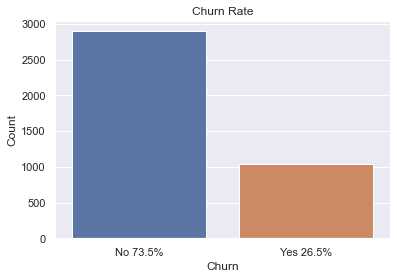

In [10]:
# visualize the churn rate
sns.set(style="darkgrid")
ax = sns.countplot(x='churn', data=train)
ax.set_title('Churn Rate')
ax.set_xlabel('Churn')
ax.set_ylabel('Count') 
ax.set_xticklabels(['No 73.5%', 'Yes 26.5%'])
plt.show()

In [11]:
# create two dataframes for churn and no churn
train_churn = train[train.churn == 1]
train_no_churn = train[train.churn == 0]

In [12]:
# create a correlation matrix of the telco data
corr_matrix = train.corr()
corr_matrix
# print only the churn column
corr_matrix['churn']

senior_citizen                          0.156587
tenure                                 -0.352443
monthly_charges                         0.202305
churn                                   1.000000
gender_Male                            -0.004491
payment_type_Credit_card_(automatic)   -0.117592
payment_type_Electronic_check           0.297489
payment_type_Mailed_check              -0.097120
contract_type_One_year                 -0.197497
contract_type_Two_year                 -0.290636
internet_service_type_Fiber_optic       0.318199
internet_service_type_None             -0.229152
contract_type_monthly                   0.409329
tenure_years                           -0.352443
Name: churn, dtype: float64

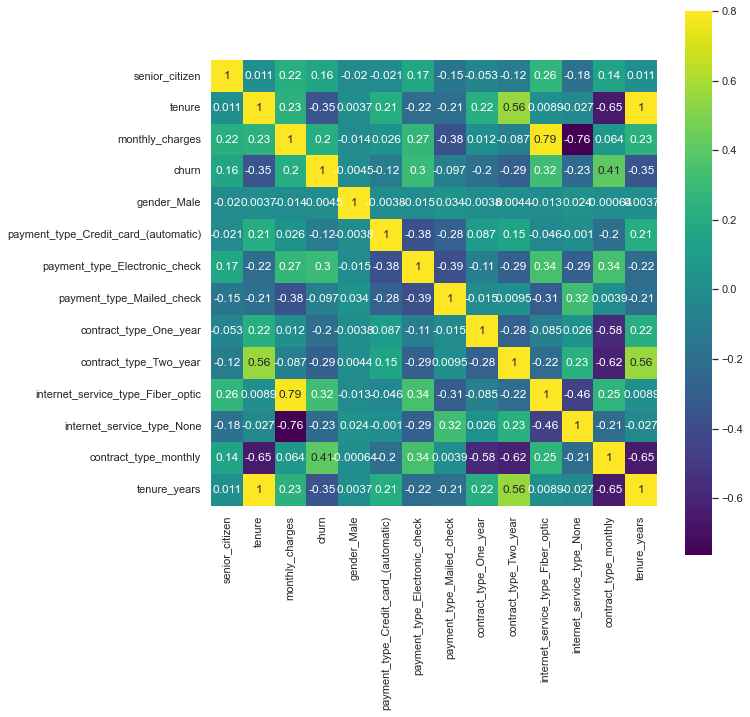

In [13]:
# visualize the upper triangle of the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, vmax=.8, square=True, annot=True, cmap='viridis')
plt.show()

In [14]:
# identify which variables are correlated with churn the most
corr_matrix['churn'].sort_values(ascending=False)

churn                                   1.000000
contract_type_monthly                   0.409329
internet_service_type_Fiber_optic       0.318199
payment_type_Electronic_check           0.297489
monthly_charges                         0.202305
senior_citizen                          0.156587
gender_Male                            -0.004491
payment_type_Mailed_check              -0.097120
payment_type_Credit_card_(automatic)   -0.117592
contract_type_One_year                 -0.197497
internet_service_type_None             -0.229152
contract_type_Two_year                 -0.290636
tenure                                 -0.352443
tenure_years                           -0.352443
Name: churn, dtype: float64

It appears that in internet_service_type_Fiber optic, payment_type_Electronic check, and contract_type_monthly  have the highest positive correlation to churn. While tenure has the highest negative correlation to churn.

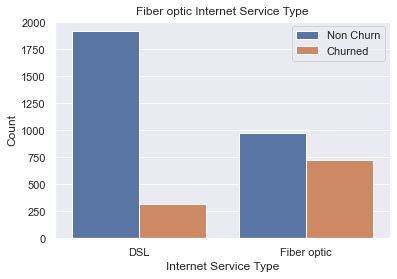

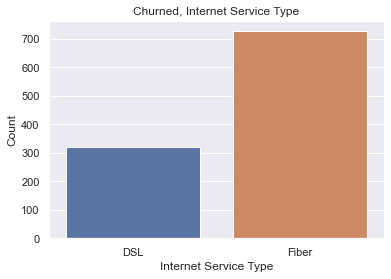

1    727
0    319
Name: internet_service_type_Fiber_optic, dtype: int64


In [15]:
# utilizing train dataset create a bar of the internet_service_type_Fiber_optic for churn customers
sns.set(style="darkgrid")
ax = sns.countplot(x='internet_service_type_Fiber_optic', hue='churn', data=train)
ax.set_title('Fiber optic Internet Service Type')
ax.set_xlabel('Internet Service Type')
ax.set_ylabel('Count')
ax.set_xticklabels(['DSL', 'Fiber optic'])
ax.legend(['Non Churn', 'Churned'], loc='upper right')
plt.show()
# utilize train_churn dataset create a bar of the internet_service_type_Fiber_optic for churn customers
sns.set(style="darkgrid")
ax = sns.countplot(x='internet_service_type_Fiber_optic', data=train_churn)
ax.set_title('Churned, Internet Service Type')
ax.set_xlabel('Internet Service Type')
ax.set_ylabel('Count')
ax.set_xticklabels(['DSL', 'Fiber'])
plt.show()
# of those who have churned how many use fiber optic
print(train_churn.internet_service_type_Fiber_optic.value_counts())

There is a significant increase of Fiber users who have churned vs those who have not.

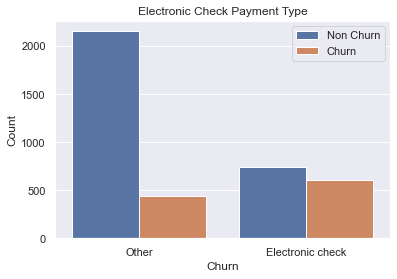

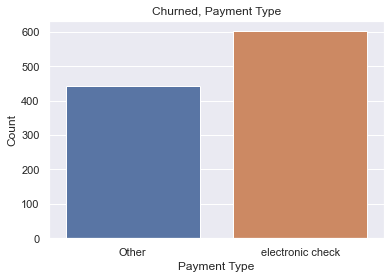

In [16]:
# create a bar of the payment_type_Electronic_check for churn customers
sns.set(style="darkgrid")
ax = sns.countplot(x='payment_type_Electronic_check', hue='churn', data=train)
ax.set_title('Electronic Check Payment Type')
ax.set_xlabel('Churn')
ax.set_ylabel('Count')
ax.set_xticklabels(['Other', 'Electronic check'])
ax.legend(['Non Churn', 'Churn'], loc='upper right')
plt.show()
# decribe the churn rate by the payment type
train.groupby('payment_type_Electronic_check')['churn'].value_counts(normalize=True)
# utilize train_churn dataset create a bar of the payment_type_Electronic_check for churn customers
sns.set(style="darkgrid")
ax = sns.countplot(x='payment_type_Electronic_check', data=train_churn)
ax.set_title('Churned, Payment Type')
ax.set_xlabel('Payment Type')
ax.set_ylabel('Count')
ax.set_xticklabels(['Other', 'electronic check'])
plt.show()


The majority of churned utilized electronic checks.

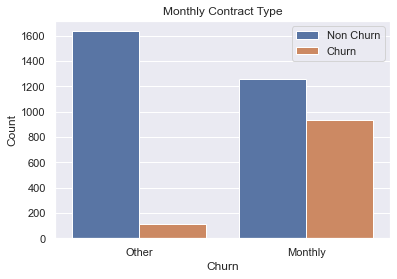

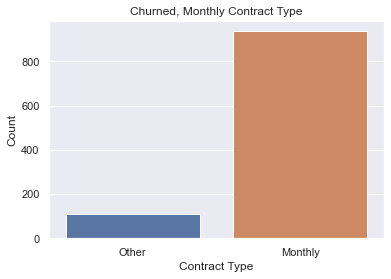

In [17]:
# create a bar of the contract_type_monthly for churn customers
sns.set(style="darkgrid")
ax = sns.countplot(x='contract_type_monthly', hue='churn', data=train)
ax.set_title('Monthly Contract Type')
ax.set_xlabel('Churn')
ax.set_ylabel('Count')
ax.set_xticklabels(['Other', 'Monthly'])
ax.legend(['Non Churn', 'Churn'], loc='upper right')
plt.show()
# decribe the churn rate by the mothly contract
train.groupby('contract_type_monthly')['churn'].value_counts(normalize=True)
# utilize train_churn dataset create a bar of the contract monthly for churn customers
sns.set(style="darkgrid")
ax = sns.countplot(x='contract_type_monthly', data=train_churn)
ax.set_title('Churned, Monthly Contract Type')
ax.set_xlabel('Contract Type')
ax.set_ylabel('Count')
ax.set_xticklabels(['Other', 'Monthly'])
plt.show()


The majority of customer who have churned are on a month to month contract.

In [18]:
# tenure vs churn
# determine the churn rate of customers that have less than 1 year of tenure
oneyr = train[train['tenure_years'] <= 1]['churn'].value_counts(normalize=True)
# determine the churn rate of customers that have between 1 and 2 years of tenure
twoyr = train[(train['tenure_years'] > 1) & (train['tenure_years'] <= 2)]['churn'].value_counts(normalize=True)
# determine the churn rate of customers that have between 2 and 3 years of tenure
threeyr = train[(train['tenure_years'] > 2) & (train['tenure_years'] <= 3)]['churn'].value_counts(normalize=True)
# determine the churn rate of customers that have between 3 and 4 years of tenure
fouryr = train[(train['tenure_years'] > 3) & (train['tenure_years'] <= 4)]['churn'].value_counts(normalize=True)
# determine the churn rate of customers that have between 4 and 5 years of tenure
fiveyr = train[(train['tenure_years'] > 4) & (train['tenure_years'] <= 5)]['churn'].value_counts(normalize=True)
# determine the churn rate of customers that have more than 5 years of tenure
moreyr = train[train['tenure_years'] > 5]['churn'].value_counts(normalize=True)
# print the churn rates replace 0 with not churned and 1 with churned
print('Less than 1 year:', round(oneyr[1], 3),'has churned')
print('Between 1 and 2 years:', round(twoyr[1], 3),'has churned')
print('Between 2 and 3 years:', round(threeyr[1], 3),'has churned')
print('Between 3 and 4 years:', round(fouryr[1], 3),'has churned')
print('Between 4 and 5 years:', round(fiveyr[1], 3),'has churned')
print('More than 5 years:', round(moreyr[1], 3),'has churned')

Less than 1 year: 0.475 has churned
Between 1 and 2 years: 0.275 has churned
Between 2 and 3 years: 0.22 has churned
Between 3 and 4 years: 0.202 has churned
Between 4 and 5 years: 0.119 has churned
More than 5 years: 0.069 has churned


The majority of customers who have churned have a tenure less than 1 year.

PRE-Conclusion:
For customers under a year of tenure, Offer to switch payment types form electronic payments to automatic.
If customers under a year of tenure has Fiber service offer to switch to DSL. Figure out whats wrong with Fiber.
Customer under a year of tenure try to lock them in a two year contract. 

Hypothesis and Testing:

Hypothesis #1
- H0: There is no correlation between internet service type and customer churn.
- Ha: There is a correlation between internet service type and customer churn.

In [19]:
# set you confidence level to 95%
alpha = 0.05
# create a cross tabulation of internet service type vs churn
crosstab = pd.crosstab(train['internet_service_type_Fiber_optic'], train['churn'])
# contingency table test - chi square test
chi2, p, dof, expected = stats.chi2_contingency(crosstab)
print('Chi-square test for Internet Service Type vs Churn:')
print('Chi-square value:', round(chi2, 3))
print('p-value:', p)

if p < alpha:
    print('Reject the null hypothesis that the Internet Service Type does not affect Churn')
else:
    print('Fail to reject the null hypothesis that the Internet Service Type does not affect Churn')

Chi-square test for Internet Service Type vs Churn:
Chi-square value: 397.778
p-value: 1.6777073449484904e-88
Reject the null hypothesis that the Internet Service Type does not affect Churn


Hypothesis 2
- HO: There is no correlation between payment_type_Electronic_check and customer churn
- HO: There is a correlation between payment_type_Electronic_check and customer churn

In [20]:
# create a cross tabulation of Electonic check vs churn
crosstab = pd.crosstab(train['payment_type_Electronic_check'], train['churn'])
# contingency table test - chi square test
chi2, p, dof, expected = stats.chi2_contingency(crosstab)
print('Chi-square test for Electronic Check vs Churn:')
print('Chi-square value:', round(chi2, 3))
print('p-value:', p)

if p < alpha:
    print('Reject the null hypothesis that the Electronic Check does not affect Churn')
else:
    print('Fail to reject the null hypothesis that the Electronic Check does not affect Churn')

Chi-square test for Electronic Check vs Churn:
Chi-square value: 347.534
p-value: 1.4595926605810564e-77
Reject the null hypothesis that the Electronic Check does not affect Churn


Hypothesis 3
- HO: There is no correlation between monthly contract and customer churn
- HO: There is a correlation between monthly contract and customer churn

In [21]:
# create a cross tabulation of monthly contract vs churn
crosstab = pd.crosstab(train['contract_type_monthly'], train['churn'])
# contingency table test - chi square test
chi2, p, dof, expected = stats.chi2_contingency(crosstab)
print('Chi-square test for monthly Contract vs Churn:')
print('Chi-square value:', round(chi2, 3))
print('p-value:', p)

if p < alpha:
    print('Reject the null hypothesis that the monthly Contract does not affect Churn')
else:
    print('Fail to reject the null hypothesis that the monthly Contract does not affect Churn')

Chi-square test for monthly Contract vs Churn:
Chi-square value: 658.786
p-value: 2.7432962054821823e-145
Reject the null hypothesis that the monthly Contract does not affect Churn


Hypothesis 4
- HO: There is no correlation between tenure under 1 year and customer churn
- HO: There is a correlation between tenure under 1 year and customer churn

In [22]:
# create a cross tabulation of oneyr vs churn
crosstab = pd.crosstab(train['tenure_years'], train['churn'])
# contingency table test - chi square test
chi2, p, dof, expected = stats.chi2_contingency(crosstab)
print('Chi-square test for Tenure vs Churn:')
print('Chi-square value:', round(chi2, 3))
print('p-value:', p)

if p < alpha:
    print('Reject the null hypothesis that the Tenure does not affect Churn')
else:
    print('Fail to reject the null hypothesis that the Tenure does not affect Churn')

Chi-square test for Tenure vs Churn:
Chi-square value: 615.614
p-value: 2.810493460189295e-87
Reject the null hypothesis that the Tenure does not affect Churn


Modeling and evaluation:

Utilize logistic regression, decision tree, and random forest models
The baseline for not churnning is 73.5%

In [23]:
# Define the features(X) and the target(y).
X_cols = ['tenure_years', 'contract_type_monthly', 'payment_type_Electronic_check', 'internet_service_type_Fiber_optic']
y_col = 'churn'
# split the data into X,y train, X,y validate, X,y test
X_train = train[X_cols]
y_train = train[y_col]
X_validate = validate[X_cols]
y_validate = validate[y_col]
X_test = test[X_cols]
y_test = test[y_col]

Train

Model 1: Logistic Regression

In [50]:
# create the model
logit = LogisticRegression(C = 1.0, random_state = 789)
# fit the model
logit.fit(X_train, y_train)
# utilize the model
y_pred1 = logit.predict(X_train)
# predict the churn rate of the test dataset
y_pred1_prob = logit.predict_proba(X_train)

print(f'Model 1 accuracy: {logit.score(X_train, y_train):.3f}')

Model 1 accuracy: 0.792


In [53]:
# create model 1 classification report
print('Model 1 classification report:')
print(classification_report(y_train, y_pred1))

Model 1 classification report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      2897
           1       0.64      0.50      0.56      1046

    accuracy                           0.79      3943
   macro avg       0.73      0.70      0.71      3943
weighted avg       0.78      0.79      0.78      3943



Model 1 preformed better than the baseline(73.5%) with an accuracy of 79%.

Model 2: Decision Tree

In [251]:
# create a decision tree classifier model
tree = DecisionTreeClassifier(max_depth = 6, random_state = 789)
# fit the model
tree.fit(X_train, y_train)
# utilize the model
y_pred2 = tree.predict(X_train)
# predict the churn rate of the test dataset
y_pred2_prob = tree.predict_proba(X_train)

print(f'Model 2 accuracy: {tree.score(X_train, y_train):.3f}')

Model 2 accuracy: 0.803


In [152]:
# create model 2 classification report
print('Model 2 classification report:')
print(classification_report(y_train, y_pred2))

Model 2 classification report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      2897
           1       0.63      0.58      0.60      1046

    accuracy                           0.80      3943
   macro avg       0.74      0.73      0.73      3943
weighted avg       0.79      0.80      0.80      3943



Model 2 had little to no increase in the accuracy but still better than the baseline. Recall increased slightly.

Model 3: Random Forest

In [264]:
# create a random forest classifier model
forest = RandomForestClassifier(bootstrap=True, max_depth=20, min_samples_leaf=14, n_estimators=100, random_state=789)
# fit the model
forest.fit(X_train, y_train)
# utilize the model
y_pred3 = forest.predict(X_train)
# predict the churn rate of the test dataset
y_pred3_prob = forest.predict_proba(X_train)

print(f'Model 3 accuracy: {forest.score(X_train, y_train):.3f}')


Model 3 accuracy: 0.805


In [214]:
# create model 3 classification report
print('Model 3 classification report:')
print(classification_report(y_train, y_pred3))

Model 3 classification report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      2897
           1       0.65      0.56      0.61      1046

    accuracy                           0.80      3943
   macro avg       0.75      0.73      0.74      3943
weighted avg       0.80      0.80      0.80      3943



Model 3 performs the best

Validate

Utilizing my top two performing models which is model 2 and model 3. I will apply them to my validate data set to determine which one will be utilzed on my test data.

Model 2(Decision Tree) Validation

In [257]:
# utilize the model 2 on validation dataset
y_pred1_validate = tree.predict(X_validate)
# predict the churn rate of the validate dataset
y_pred1_prob_validate = tree.predict_proba(X_validate)

print(f'Model 2 accuracy on validation dataset: {tree.score(X_validate, y_validate):.3f}')


Model 2 accuracy on validation dataset: 0.800


In [244]:
# create a classification report for the validation dataset
print('Model 2 classification report on validation dataset:')
print(classification_report(y_validate, y_pred1_validate))

Model 2 classification report on validation dataset:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1242
           1       0.65      0.50      0.57       449

    accuracy                           0.80      1691
   macro avg       0.74      0.70      0.72      1691
weighted avg       0.79      0.80      0.79      1691



Model 3(Random Forest) Validation

In [265]:
# utilize the model 3 on validation dataset
y_pred2_validate = forest.predict(X_validate)
# predict the churn rate of the validate dataset
y_pred2_prob_validate = forest.predict_proba(X_validate)

print(f'Model 3 accuracy on validation dataset: {forest.score(X_validate, y_validate):.3f}')

Model 3 accuracy on validation dataset: 0.797


In [246]:
# create a classification report for the validation dataset
print('Model 3 classification report on validation dataset:')
print(classification_report(y_validate, y_pred2_validate))

Model 3 classification report on validation dataset:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1242
           1       0.65      0.53      0.58       449

    accuracy                           0.80      1691
   macro avg       0.74      0.71      0.72      1691
weighted avg       0.79      0.80      0.79      1691



Both models perform very simular on the validate data.

Model 2's accuracy lowered .003 in the validate sett while model 3 accuracy lowered .007.


Test:
Model 2 will be utilized in the test data set

In [267]:
# use model 2 on test dataset
y_pred_test = tree.predict(X_test)
# predict the churn rate of the test dataset
y_pred_prob_test = tree.predict_proba(X_test)
# print the accuracy of the model
print(f'Model 2 accuracy on test dataset: {tree.score(X_test, y_test):.3f}')

Model 2 accuracy on test dataset: 0.779


In [268]:
# create a classification report for the test dataset
print('Model 2 classification report on test dataset:')
print(classification_report(y_test, y_pred_test))

Model 2 classification report on test dataset:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1035
           1       0.62      0.44      0.51       374

    accuracy                           0.78      1409
   macro avg       0.72      0.67      0.69      1409
weighted avg       0.76      0.78      0.77      1409



Predicting the rate of churn

In [271]:
# make .csv file of the test dataset with the predicted churn rate from model 2
# reset the index of the test dataset
reset_test = test.reset_index()
# add the predicted churn rate from model 2 to the test dataset
test_proba_tree = pd.DataFrame(y_pred_prob_test, columns = ['no_churn', 'churn_prob'])
print(test_proba_tree)

      no_churn  churn_prob
0     0.808290    0.191710
1     0.619565    0.380435
2     0.968750    0.031250
3     0.842857    0.157143
4     1.000000    0.000000
...        ...         ...
1404  0.968750    0.031250
1405  0.579310    0.420690
1406  0.742268    0.257732
1407  0.573034    0.426966
1408  0.434286    0.565714

[1409 rows x 2 columns]


In [277]:
# concatenate the predicted churn rate from model 2 to the test dataset
test_proba_tree = pd.concat([reset_test, test_proba_tree['churn_prob']], axis = 1)
test_proba_tree['predicted_churn'] = y_pred_test
test_proba_tree


,index,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,payment_type_Electronic_check,payment_type_Mailed_check,contract_type_One_year,contract_type_Two_year,internet_service_type_Fiber_optic,internet_service_type_None,contract_type_monthly,tenure_years,churn_prob,predicted_churn
0,3818,5370-IIVVL,0,No,No,37,Yes,Yes,No,Yes,...,0,0,1,0,1,0,0,3.083333,0.191710,0
1,6025,8519-IMDHU,1,Yes,No,15,Yes,Yes,No,No,...,0,0,0,0,1,0,1,1.250000,0.380435,0
2,636,0930-EHUZA,0,No,No,36,Yes,No,Yes,Yes,...,0,1,1,0,0,0,0,3.000000,0.031250,0
3,2593,3705-RHRFR,0,Yes,No,69,Yes,Yes,Yes,No,...,0,0,0,1,1,0,0,5.750000,0.157143,0
4,2015,2907-ILJBN,0,Yes,Yes,11,Yes,No,No internet service,No internet service,...,0,1,1,0,0,1,0,0.916667,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,5024,7061-OVMIM,0,Yes,Yes,30,Yes,No,No internet service,No internet service,...,0,0,1,0,0,1,0,2.500000,0.031250,0
1405,1511,2220-IAHLS,0,No,No,1,Yes,No,No internet service,No internet service,...,0,0,0,0,0,1,1,0.083333,0.420690,0
1406,5179,7284-BUYEC,0,No,No,5,No,No phone service,No,Yes,...,0,0,0,0,0,0,1,0.416667,0.257732,0
1407,6647,9450-TRJUU,0,No,No,35,Yes,Yes,No,No,...,1,0,0,0,1,0,1,2.916667,0.426966,0


In [281]:
# create a new dataframe named csv with customer id, predicted, and churn probability
csv = pd.DataFrame(test_proba_tree, columns = ['customer_id', 'predicted_churn', 'churn_prob'])
csv.to_csv('test_proba_tree.csv', index = False)
csv.predicted_churn.value_counts()

0    1144
1     265
Name: predicted_churn, dtype: int64

According to the model 265 customers are predicted to churn with a 78% accuracy

Conclusions
- Baseline set at 73.5% 
- Test model achived a 78% accuracy
- Model 2(Decision Tree) was the most consistant through train, validate, and test model
- Final test ran predicted 265 customers would churn out of the test data

Reccomendations on how to precide.
- Offer incintves to move customers from month to month to a 1 or 2 year contract.
- Offer incintive to setup autopay 
- Target customer who have a tenure less then 12 months
- Create surveys to check the integrety of the Fiber optic internet service
- For customers on Fiber offer DSL until Fiber is stable